In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
from helper_functions import regressor, scatter_compare, data_cleaner, date_to_decimal_year, volcano_rain_frame, data_cleaner

In [2]:
folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/um_volcano_project/GALAPAGOS_DATA'

In [3]:
# Import tables
rainfall = pd.read_csv(os.path.join(folder_path, "cleaned_precip_galap.csv"))
eruptions = pd.read_csv(os.path.join(folder_path, "eruptions_galapagos3.csv"))

bellavista = pd.read_csv(os.path.join(folder_path, "climate_bellavista.csv"))
ayora = pd.read_csv(os.path.join(folder_path, "climate_puerto-ayora.csv"))


In [4]:
sites_dict = {'Wolf': (-91.35, .05, 'Wolf'), 'Fernandina': (-91.45, -.45, 'Fernandina'), 'Negra, Sierra': (-91.15, -.85, 'Sierra Negra'), 'Azul, Cerro': (-91.25, -.55, 'Cerro Azul') } # Long/lat pairs must exist in rainfall data
gauges_dict = {'Ayora': (-90.35,-.75)}
#volcanos = {'Wolf': (-91.20, 0.0), 'Fernandina': (-91.33, -0.22), 'Negra, Sierra': (-91.17, -0.83), 'Azul, Cerro': (-91.24, -0.55), 'Bellavista': (-90.33, -.69), 'Ayora': (-90.3,-.74)} # Long/lat pairs must exist in rainfall data
compare_site = ayora  # Choose a gauge site to compare to (currently either ayora or bellavista)
site_name = 'Ayora' # Same choice as for compare_site, but as a string and capitalized
rolling_number = 90 # Number of days to average rainfall over
print_summary = True # Make true if you want to see summary of regression



                            OLS Regression Results                            
Dep. Variable:                   roll   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                 1.451e+04
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:00:18   Log-Likelihood:                -4261.8
No. Observations:                8254   AIC:                             8528.
Df Residuals:                    8252   BIC:                             8542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0485      0.006     -8.460      0.0

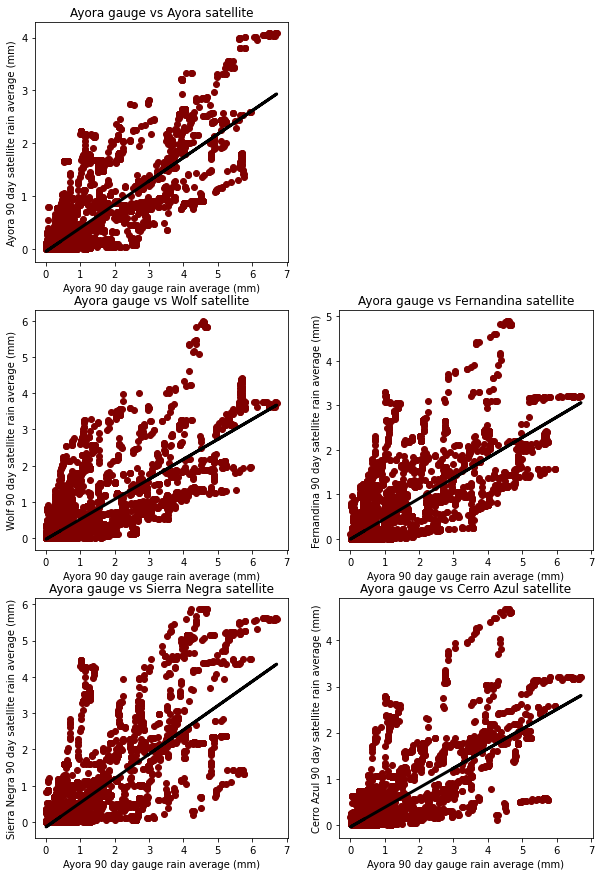

In [5]:
compare_frame = data_cleaner(compare_site, rolling_number)
scatter_compare(rainfall, sites_dict, gauges_dict, compare_frame, site_name, rolling_number)

Below, we perform a linear regression between Ayora gauge data and Ayora satellite data from 2000 to 2023, to demonstrate the strength of correlation for 90 day averages.

                            OLS Regression Results                            
Dep. Variable:               roll_two   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                 1.451e+04
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:15:11   Log-Likelihood:                -9099.7
No. Observations:                8254   AIC:                         1.820e+04
Df Residuals:                    8252   BIC:                         1.822e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4224      0.009     45.743      0.0

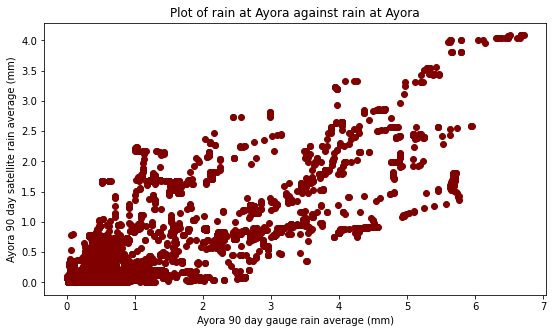

In [7]:
rain_frame = volcano_rain_frame(rainfall, gauges_dict, 'Ayora', rolling_number)
compare_frame = data_cleaner(compare_site, rolling_number)

reg = regressor(rain_frame, compare_frame, print_summary)
scatter_compare(rain_frame, 'Ayora', compare_frame, site_name, rolling_number)

Next, we perform linear regressions between Ayora gauge data and each volcano site, demonstrating the ability to use Ayora data for hindcasting rainfall predictions.

Below is the summary table for Wolf.
                            OLS Regression Results                            
Dep. Variable:               roll_two   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                 1.134e+04
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:19:39   Log-Likelihood:                -9718.9
No. Observations:                8254   AIC:                         1.944e+04
Df Residuals:                    8252   BIC:                         1.946e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

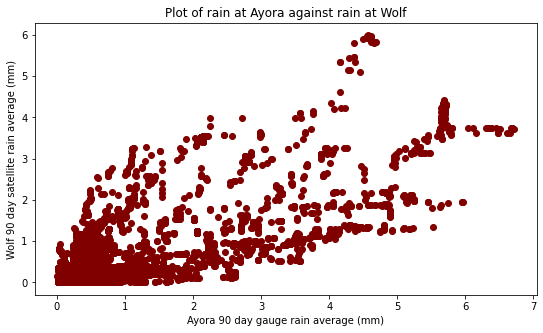

Below is the summary table for Fernandina.
                            OLS Regression Results                            
Dep. Variable:               roll_two   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                 1.043e+04
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:19:40   Log-Likelihood:                -9914.1
No. Observations:                8254   AIC:                         1.983e+04
Df Residuals:                    8252   BIC:                         1.985e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

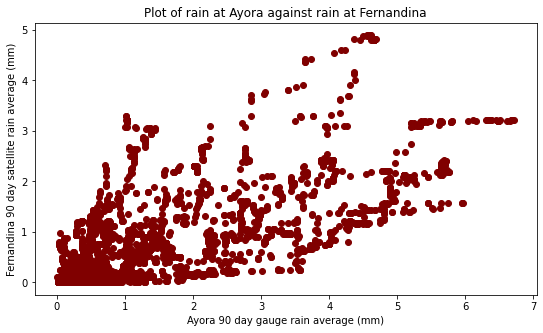

Below is the summary table for Negra, Sierra.
                            OLS Regression Results                            
Dep. Variable:               roll_two   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                 1.226e+04
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:19:40   Log-Likelihood:                -9528.9
No. Observations:                8254   AIC:                         1.906e+04
Df Residuals:                    8252   BIC:                         1.908e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

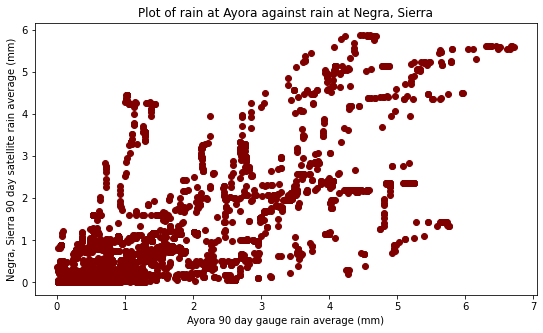

Below is the summary table for Azul, Cerro.
                            OLS Regression Results                            
Dep. Variable:               roll_two   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                 1.025e+04
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:19:40   Log-Likelihood:                -9953.9
No. Observations:                8254   AIC:                         1.991e+04
Df Residuals:                    8252   BIC:                         1.993e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

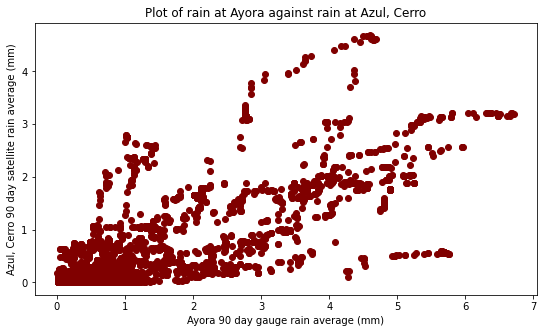

In [11]:
compare_frame = data_cleaner(compare_site, rolling_number)

for pick in sites_dict:
    
    print("Below is the summary table for " + pick + ".")
    rain_frame = volcano_rain_frame(rainfall, sites_dict, pick, rolling_number)
    reg = regressor(rain_frame, compare_frame, print_summary)
    scatter_compare(rain_frame, pick, compare_frame, site_name, rolling_number)